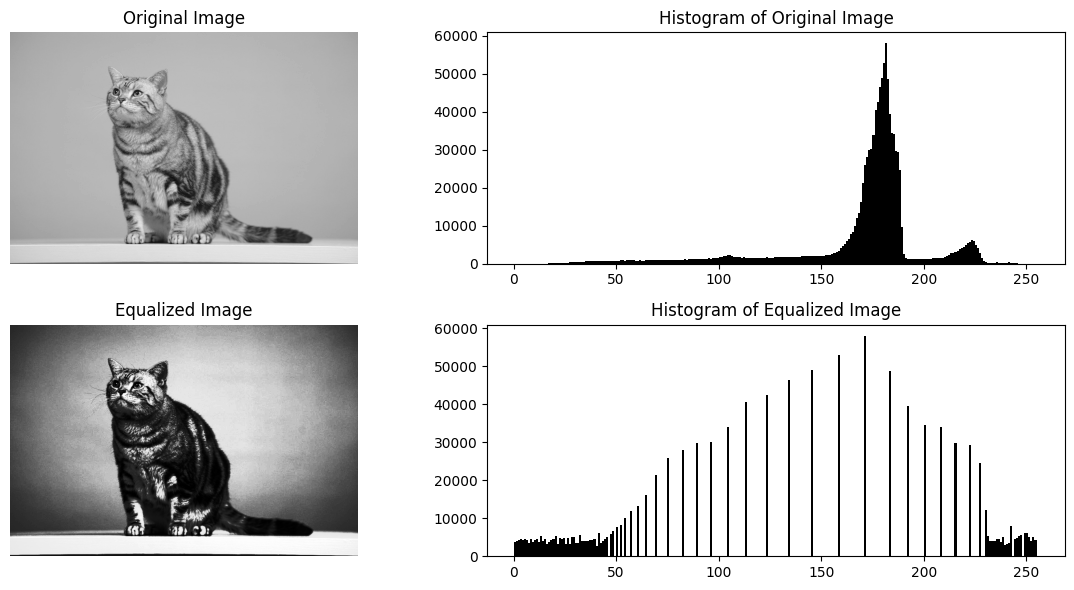

Equalized image saved as equalized.jpg


In [1]:
# histogram_equalization.py

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(input_path, output_path):
    # Load the image and convert to grayscale
    img = Image.open(input_path).convert("L")
    img_array = np.array(img)
    
    # Flatten the image array and calculate histogram
    hist, bins = np.histogram(img_array.flatten(), 256, [0, 256])
    
    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]  # Normalize the CDF to [0, 255]

    # Apply histogram equalization
    img_equalized = np.interp(img_array.flatten(), bins[:-1], cdf_normalized)
    img_equalized = img_equalized.reshape(img_array.shape).astype(np.uint8)
    equalized_img = Image.fromarray(img_equalized)
    
    # Save and display the images
    equalized_img.save(output_path)
    
    # Plot original and equalized images with histograms
    plt.figure(figsize=(12, 6))
    
    # Original Image and Histogram
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(2, 2, 2)
    plt.hist(img_array.flatten(), 256, [0, 256], color='black')
    plt.title("Histogram of Original Image")

    # Equalized Image and Histogram
    plt.subplot(2, 2, 3)
    plt.imshow(equalized_img, cmap="gray")
    plt.title("Equalized Image")
    plt.axis("off")
    
    plt.subplot(2, 2, 4)
    plt.hist(img_equalized.flatten(), 256, [0, 256], color='black')
    plt.title("Histogram of Equalized Image")

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    input_path = "input.jpg"          # Replace with the path to your input image
    output_path = "equalized.jpg"      # Path for saving the equalized image
    histogram_equalization(input_path, output_path)
    print(f"Equalized image saved as {output_path}")
